In [1]:
%cd ..

import pandas as pd
import numpy as np

/home/tox/Reactions


In [2]:
test_lengths = pd.read_csv('data_reactions/test_lengths.csv')
valid_lengths = pd.read_csv('data_reactions/valid_lengths.csv')
train_lengths = pd.read_csv('data_reactions/train_lengths.csv')

In [3]:
list_lengths = [train_lengths, valid_lengths, test_lengths]

In [4]:
tot_lengths = pd.concat(list_lengths, ignore_index=True)

In [5]:
tot_lengths.shape

(1002970, 4)

# Data plot

In [6]:
from src.utils.extra import notation_table
from rdkit import Chem

In [8]:
tot_sm=pd.concat([
    pd.read_csv('data_reactions/train_smiles.tar.xz', compression='xz', sep='\t'),
    pd.read_csv('data_reactions/valid_smiles.tar.xz', compression='xz', sep='\t'),
    pd.read_csv('data_reactions/test_smiles.tar.xz', compression='xz', sep='\t'),
], ignore_index=True)

In [9]:
equal_length_idx,*_ = tot_lengths.query('fragsmiles > 500').index

In [11]:
equal_length_idx

178172

In [12]:
tot_lengths.loc[equal_length_idx].values

array([563, 563, 563, 563])

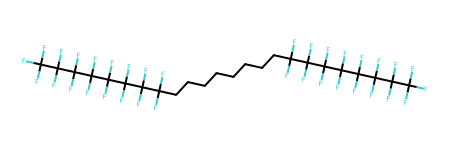

In [13]:
Chem.MolFromSmiles(tot_sm.loc[equal_length_idx,'product'].replace(' ', ''))

# Definite Chart

In [ ]:
from matplotlib import pyplot as plt, ticker
import matplotlib as mpl

In [87]:
kwargs_hist=dict(
    range=(0,200),
    bins = 200,
    edgecolor='white',
    histtype='stepfilled',
    alpha=.8,
    rasterized=True,
)

In [20]:
from matplotlib import gridspec

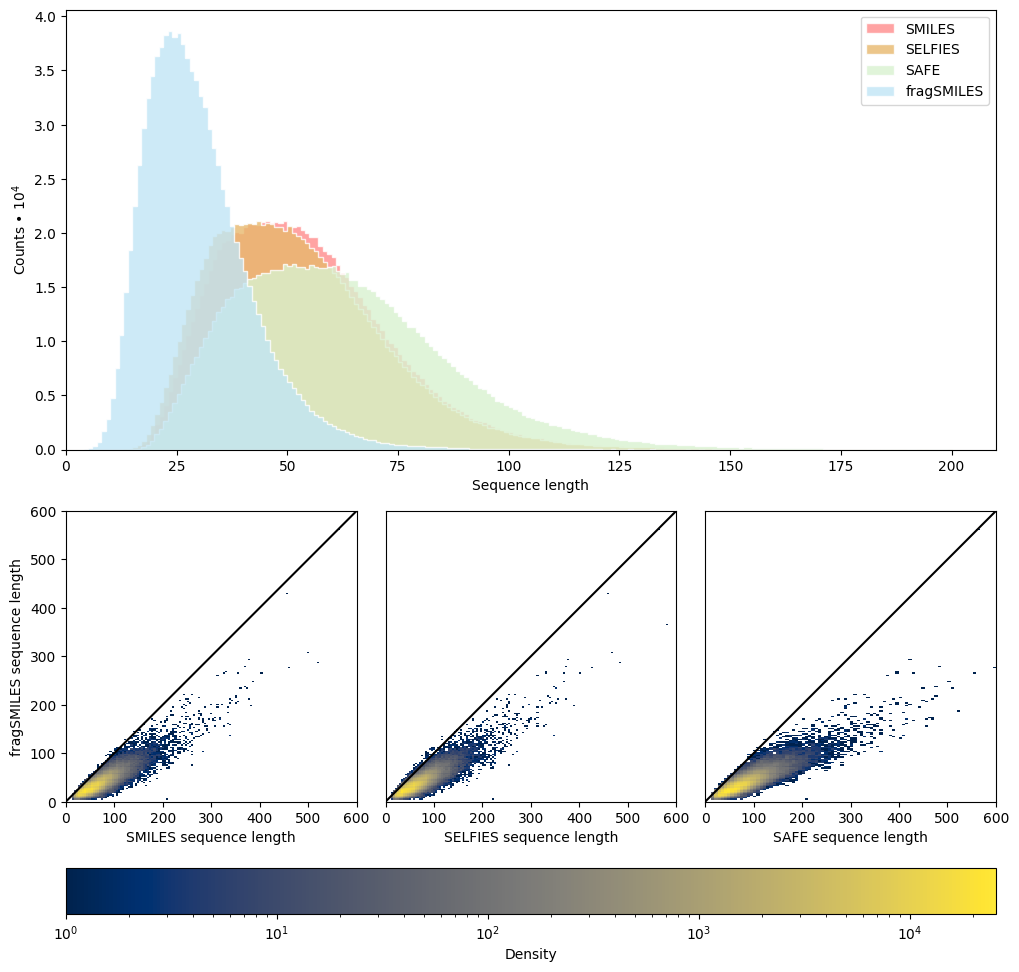

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], wspace=0.1, hspace=0.1)  # Due righe, tre colonne

big_ax = plt.subplot(gs[0, :])  # Occupa tutte le colonne della prima riga
idx_ax = 0
axes=[]
vmax = 0
meshes = []
for notation,row in notation_table.iterrows():
	lengths = tot_lengths[notation]
	name = row['name']
	big_ax.hist(lengths, label=name, facecolor=row['color'], **kwargs_hist)

	if notation == 'fragsmiles':
		continue

	if idx_ax > 0:
		ax = fig.add_subplot(gs[1, idx_ax], sharex=ax, sharey=ax)
		ax.yaxis.set_visible(False)
	else:
		ax = fig.add_subplot(gs[1, idx_ax])
		base_data = hist_data

	axes.append(ax)

	hist_data = ax.hist2d(
	lengths,
	fr_lengths,
	bins=(200,200),
	rasterized=True,
	norm=mpl.colors.LogNorm(),
	cmap='cividis'
	)

	if vmax < hist_data[0].max():
		base_data = hist_data
		vmax=hist_data[0].max()

	meshes.append(hist_data[3])
    
	ax.plot ( [0,600], [0,600], c='black' )
	ax.set_xlim(0,600)
	ax.set_ylim(0,600)

	ax.set_xlabel(f'{name} sequence length')
	ax.set_ylabel('fragSMILES sequence length')
	ax.set(adjustable='box', aspect='equal')
    
	idx_ax+=1


big_ax.set_xlabel('Sequence length')

ticks = ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x*0.0001))
big_ax.yaxis.set_major_formatter(ticks)
big_ax.set_ylabel('Counts • 10$^4$')
big_ax.set_xlim(0,None)
big_ax.legend()

for mesh in meshes:
	mesh.set_norm(mpl.colors.LogNorm(vmax=vmax))

cbar = fig.colorbar(base_data[3], ax=axes, orientation='horizontal',location='bottom')
	
cbar.set_label('Density')

In [101]:
fig.savefig('floats/figures/lengths.pdf', bbox_inches='tight')

# Lengths Data

In [26]:
tot_lengths.describe().T[['mean','std']]

,mean,std
fragsmiles,29.395997,12.362535
smiles,53.815090,20.213844
selfies,52.316979,20.301475
safe,62.450678,25.181302


In [31]:
for split_length, split in zip(list_lengths, ['train','valid','test']):
    print(split,':',
    ((split_length['fragsmiles'] <=150) & (split_length['smiles'] <=200)).sum()
    )

train : 902255
valid : 50113
test : 50234


Here, max length for SELFIES and SAFE notations were found. These values are stored in src -> configs -> constants

In [ ]:
tot_lengths.query('fragsmiles<=150 and smiles <=200').selfies.max()

208

In [ ]:
tot_lengths.query('fragsmiles<=150 and smiles <=200').safe.max()

389